# LCFit band-by-band using python (`pycoco`)
---
## Aim
To fit the band with the best sampling first, then propagate the best fit params forward as a initial guess for the other bands. Should help constrain the peak.

In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    from importlib import reload
except:
    pass

from __future__ import print_function ## Force python3-like printing

from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import sys
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV
reload(pcc.defaults)
reload(pcc.functions)

import pyCoCo as pccsims

In [3]:
# filter_path = "/Users/berto/Code/CoCo/data/filters"
# coco_root_path = "/Users/berto/Code/CoCo"
coco_root_path = os.environ["COCO_ROOT_DIR"]
filter_path = os.path.join(coco_root_path, "data/filters")

coco = pccsims.pyCoCo(pcc.utils.b(filter_path), pcc.utils.b(coco_root_path))

inputs:

* **`snname`**
* **`redshift`**
* **`absmag offset`**
* **`EBV MW`**
* **`EBV Host`**
* **`Rv`**
* **`MJD at Peak`**

* **`MJD to simulate`**
* **`filters to simulate`**

In [3]:
sn = pcc.SNClass("SN2006aj")
print(sn.name)
sn.load_phot( path = os.path.join(coco_root_path, 'data/lc/' + sn.name + '.dat'))
sn.load_list(os.path.join(coco_root_path,"lists/" + sn.name + ".list"))
sn.load_spec()
# sn.check_overlaps()
sn.get_lcfit(os.path.join(coco_root_path, "recon/" + sn.name + ".dat"))

SN2006aj
/Users/berto/Code/CoCo/data/lc/SN2006aj.dat


<IPython.core.display.Javascript object>


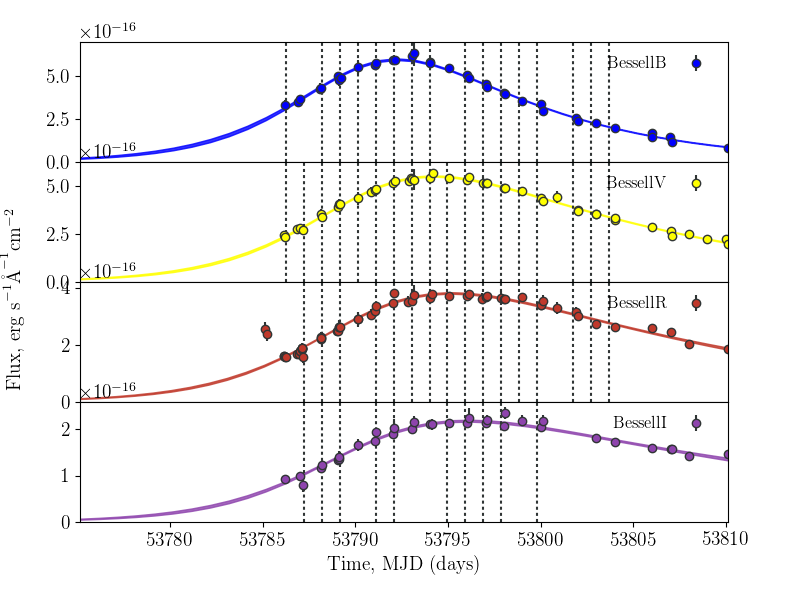

In [4]:
sn.plot_lc()

## Find the band with the best data
---
What metric to use...
 
 - Epochs?
 - S/N 

In [5]:
for band in sn.phot.data:
    sn.phot.data[band]

In [6]:
p = pcc.PhotometryClass()
p.load("/Users/berto/data/cfro_SNe.dat")

/Users/berto/Code/verbose-enigma/pycoco/classes.py:2031: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


<IPython.core.display.Javascript object>


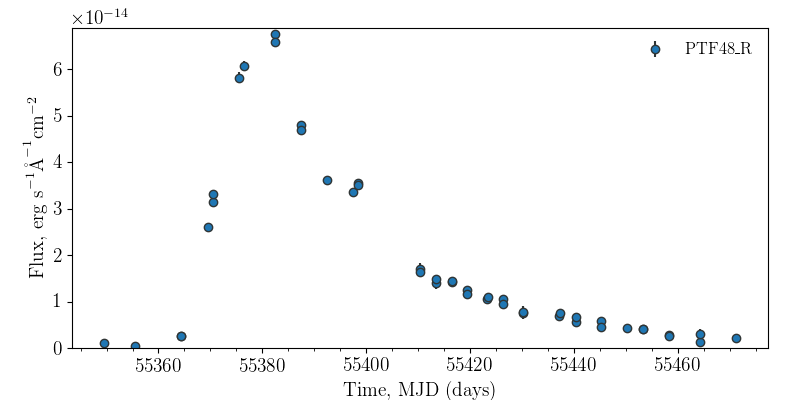

/Users/berto/Code/verbose-enigma/pycoco/classes.py:1402: UserWarning: Cannot find filter in the pycoco colours registry
  warnings.warn("Cannot find filter in the pycoco colours registry")


In [9]:
p.plot()

In [14]:
sn = pcc.SNClass("Cfro_SNe")
sn.load_phot("/Users/berto/data/cfro_SNe")

/Users/berto/data/cfro_SNe.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:2031: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


<IPython.core.display.Javascript object>


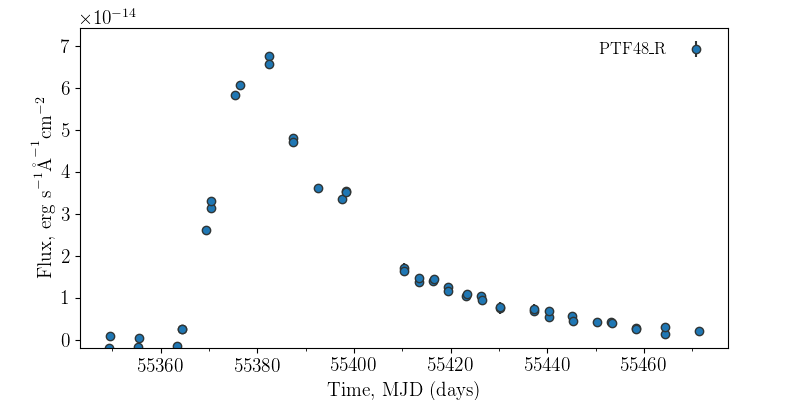

/Users/berto/Code/verbose-enigma/pycoco/classes.py:2371: UserWarning: Cannot find filter in the pycoco colours registry
  warnings.warn("Cannot find filter in the pycoco colours registry")


In [15]:
sn.plot_lc(multiplot=False)

In [16]:
sn.get_lcfit(os.path.join(coco_root_path, "recon/" + sn.name + ".dat"))

/Users/berto/Code/verbose-enigma/pycoco/classes.py:2031: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


<IPython.core.display.Javascript object>


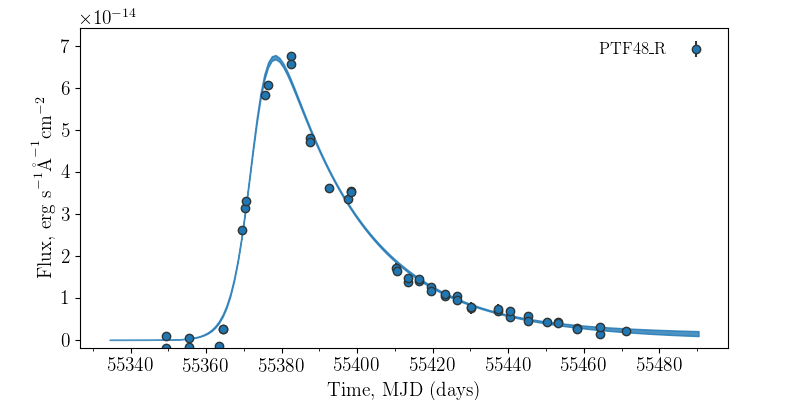

/Users/berto/Code/verbose-enigma/pycoco/classes.py:2371: UserWarning: Cannot find filter in the pycoco colours registry
  warnings.warn("Cannot find filter in the pycoco colours registry")


In [17]:
sn.plot_lc(multiplot=False)

In [24]:
sn = pcc.SNClass("Cfro_SNe")
sn.load_phot("/Users/berto/data/cfro_SNe_orig")
x = sn.phot.phot

/Users/berto/data/cfro_SNe_orig.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:2031: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


In [25]:
x["ptfzp"] = 27.

In [42]:
x["m"] = -2.5*np.log10(x["flux"])+x["ptfzp"]

/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


In [43]:
x["PTFR_AB_zp"] = pcc.kcorr.calc_AB_zp("PTF48_R")

/Users/berto/Code/verbose-enigma/pycoco/classes.py:2031: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


In [44]:
x

MJD,flux,flux_err,filter,ptfzp,PTFR_AB_zp,m
d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),,,,erg / (Angstrom cm2 s)
float64,float64,float64,str7,float64,float64,float64
55349.44,-193.3,95.7,PTF48_R,27.0,21.490936317,nan
55349.4834,97.4,99.3,PTF48_R,27.0,21.490936317,22.0286026078
55355.4071,-160.0,66.7,PTF48_R,27.0,21.490936317,nan
55355.4512,37.2,54.5,PTF48_R,27.0,21.490936317,23.0736426503
55363.4624,-145.4,54.8,PTF48_R,27.0,21.490936317,nan
55364.3825,251.8,66.4,PTF48_R,27.0,21.490936317,20.9973606856
55364.4266,266.1,60.8,PTF48_R,27.0,21.490936317,20.9373878136
55369.4563,2606.7,66.3,PTF48_R,27.0,21.490936317,18.4597723701


In [56]:
scaling = np.nanmean(x["flux"]/np.power(10., -(x["m"]+x["PTFR_AB_zp"])/2.5))
print(scaling)

2.49100458433e+19


In [57]:
x["flux"] = x["flux"]/scaling
x["flux_err"] = x["flux_err"]/scaling

In [59]:
x

MJD,flux,flux_err,filter,ptfzp,PTFR_AB_zp,m
d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),,,,erg / (Angstrom cm2 s)
float64,float64,float64,str7,float64,float64,float64
55349.44,-7.75992148774e-18,3.8418235198e-18,PTF48_R,27.0,21.490936317,nan
55349.4834,3.91006907866e-18,3.98634352681e-18,PTF48_R,27.0,21.490936317,22.0286026078
55355.4071,-6.42311142285e-18,2.6776345744e-18,PTF48_R,27.0,21.490936317,nan
55355.4512,1.49337340581e-18,2.18787232841e-18,PTF48_R,27.0,21.490936317,23.0736426503
55363.4624,-5.83700250552e-18,2.19991566233e-18,PTF48_R,27.0,21.490936317,nan
55364.3825,1.01083716017e-17,2.66559124048e-18,PTF48_R,27.0,21.490936317,20.9973606856
55364.4266,1.06824371851e-17,2.44078234068e-18,PTF48_R,27.0,21.490936317,20.9373878136
55369.4563,1.04644528412e-16,2.66157679585e-18,PTF48_R,27.0,21.490936317,18.4597723701


In [60]:
y = x[["MJD", "flux", "flux_err", "filter"]]

In [61]:
y

MJD,flux,flux_err,filter
d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,str7
55349.44,-7.75992148774e-18,3.8418235198e-18,PTF48_R
55349.4834,3.91006907866e-18,3.98634352681e-18,PTF48_R
55355.4071,-6.42311142285e-18,2.6776345744e-18,PTF48_R
55355.4512,1.49337340581e-18,2.18787232841e-18,PTF48_R
55363.4624,-5.83700250552e-18,2.19991566233e-18,PTF48_R
55364.3825,1.01083716017e-17,2.66559124048e-18,PTF48_R
55364.4266,1.06824371851e-17,2.44078234068e-18,PTF48_R
55369.4563,1.04644528412e-16,2.66157679585e-18,PTF48_R


In [62]:
p = pcc.PhotometryClass()
p.load_table(y)

/Users/berto/Code/verbose-enigma/pycoco/classes.py:2031: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


<IPython.core.display.Javascript object>


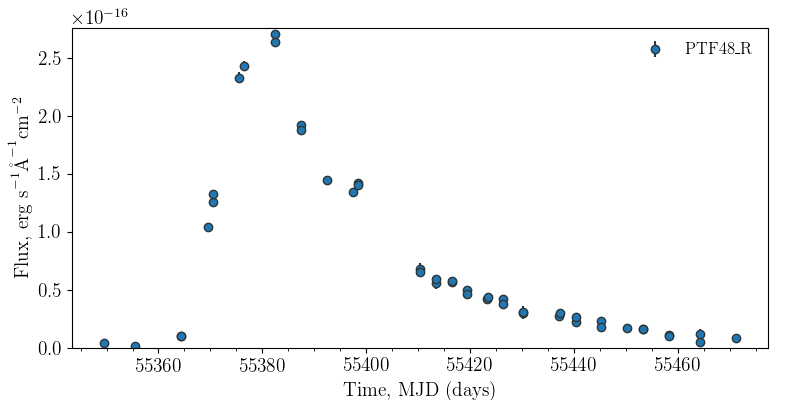

/Users/berto/Code/verbose-enigma/pycoco/classes.py:1402: UserWarning: Cannot find filter in the pycoco colours registry
  warnings.warn("Cannot find filter in the pycoco colours registry")


In [64]:
p.plot()

In [67]:
p.save("PTF38093380.dat", path = "/Users/berto/projects/")

has data
/Users/berto/projects/PTF38093380.dat
Writing /Users/berto/projects/PTF38093380.dat


In [68]:
pcc.test_LCfit("PTF38093380")

/Users/berto/Code/CoCo/


/Users/berto/Code/verbose-enigma/pycoco/functions.py:875: UserWarning: /Users/berto/Code/CoCo/recon/PTF38093380.stat not found. Have you done a fit?
  " not found. Have you done a fit?")
/Users/berto/Code/verbose-enigma/pycoco/functions.py:875: UserWarning: /Users/berto/Code/CoCo/recon/PTF38093380.dat not found. Have you done a fit?
  " not found. Have you done a fit?")


False

In [69]:
pcc.run_LCfit("/Users/berto/projects/PTF38093380.dat")

current list.txt is up to date. re run with force = True to force.
Running CoCo lcfit on /Users/berto/projects/PTF38093380.dat
Fit complete


In [4]:
sn = pcc.SNClass("PTF38093380")
sn.load_phot("/Users/berto/projects/PTF38093380")
sn.get_lcfit(os.path.join(coco_root_path, "recon/" + sn.name + ".dat"))

/Users/berto/projects/PTF38093380.dat


<IPython.core.display.Javascript object>


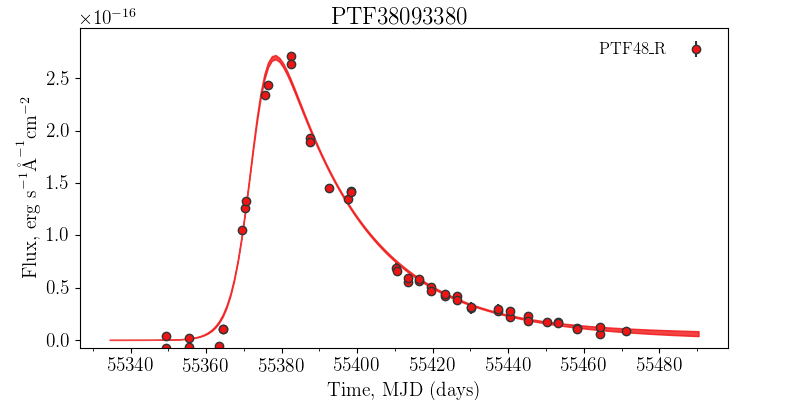

In [7]:
sn.plot_lc(multiplot=False, showsnname=True, savepdf=True, outpath="/Users/berto/projects/PTF38093380")